In [1]:
import cv2
import time
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as K
import tensorflow.keras.models as load_model
from keras.models import load_model

K.clear_session()

Using TensorFlow backend.


||Name|正常值||
|----|----|----|----|
|0|白细胞|4-10||
|1|红细胞|男4-5，女3.5-5.0||
|2|血红蛋白|男120-160 女110-150||
|3|血小板|125-350||

In [2]:
# 插值函数
def cvalue(fvals):
    y,x= np.mgrid[-1:1:5j, -1:1:5j]
    newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')  
    xnew = np.linspace(-1,1,10)
    ynew = np.linspace(-1,1,10)
    fnew = newfunc(xnew, ynew)  
    return fnew

一开始我想的 源数据21×1，填充4个变成25×1 即5×5，然后使用插值转换为10×10，这样数据量相当于800 train：test=4:1，train样本也就是大概600×10×10

In [3]:
def create_dataset():
    data1 = pd.read_excel('data/data_54.xls', index_col='编号').values
    np.random.seed(15)
    np.random.shuffle(data1)
    all_data = data1[:, 1:]
            
#     all_data = np.delete(all_data, 1, axis=1) 
    
    
    scalar = MinMaxScaler(feature_range=(0, 1))
    all_data = scalar.fit_transform(all_data)
    all_label = np.array([i for i in data1[:, 0]])
    
    all_data1 = []
    for i in all_data:
        ow = (np.hstack((i, [0 for i in range(3)]))).reshape((5,5))
        fow = cvalue(ow)
        fow = np.pad(fow,3,'constant').reshape((16,16,1))
#         是否插值，if插值，下面函数ow换为fow即可
        all_data1.append(fow)
    all_data = np.array(all_data1)
    sz = int(0.8 * len(data1))
    x_train = all_data[:sz]
    y_train = all_label[:sz]
    x_test = all_data[sz:]
    y_test = all_label[sz:]
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = create_dataset()
print(x_train.shape)
print(y_train.shape)

# print(x_train[0])
# plt.figure(figsize=(20, 20))
# plt.imshow(x_train[0])
# print(y_train[0])

(615, 16, 16, 1)
(615,)


0.0


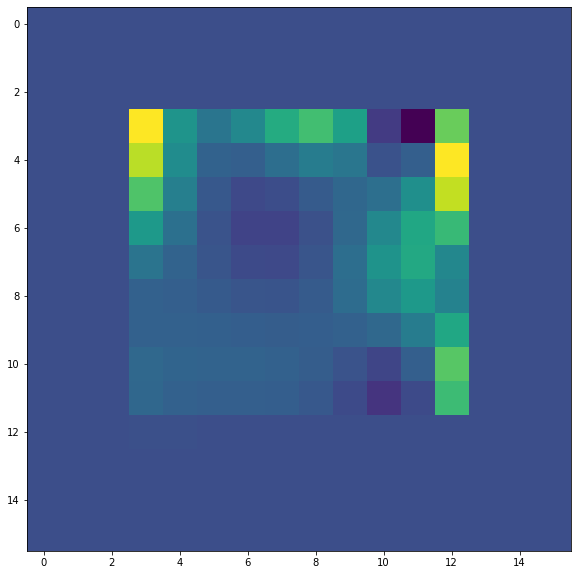

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[8].reshape((16,16)))
print(y_train[8])

In [6]:
inputs = layers.Input(shape=(16,16,1), name='inputs')
conv1 = layers.Conv2D(32,3,3,padding="same",activation="relu",name="conv1")(inputs)
# maxpool1 = layers.MaxPool2D(pool_size=(2,2),name="maxpool1")(conv1)
conv2 = layers.Conv2D(64,3,3,padding="same",activation="relu",name="conv2")(conv1)
maxpool2 = layers.MaxPool2D(pool_size=(2,2),name="maxpool2")(conv2)
flatten1 = layers.Flatten(name="flatten1")(maxpool2)
dense1 = layers.Dense(512,activation="relu",name="dense1")(flatten1)
dense2 = layers.Dense(2,activation="softmax",name="dense2")(dense1)
model = tf.keras.Model(inputs,dense2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.fit(x_train, y_train, batch_size=4, epochs=100 ,verbose=2)
save_name = "model_"+time.strftime("%m_%d_%H_%M_%S",time.gmtime())
model.save("res/"+save_name+".h5")

In [ ]:
plt.plot(model.history.epoch,model.history.history['loss'])
plt.ylim(0,1)
plt.show()

In [ ]:
plt.plot(model.history.epoch,model.history.history['acc'])
plt.ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
log = model.predict(x_test)
log = pd.DataFrame(log)
log.to_csv("log/"+save_name+"_acc_"+str(model.evaluate(x_test,y_test)[-1])+".csv")

In [ ]:
!for %N in (1 1 1 1 1 1 1 1 1 1 1 1 1) do (python jiaoben.py)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score,roc_curve,auc

y_pred = pd.read_csv("log/model_05_04_10_58_18_acc_0.7727272.csv",index_col='Unnamed: 0').values
y_pr = y_pred
y_pred = list([list(i).index(max(i)) for i in y_pred])

print(y_pred)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [9]:
y_test = list([int(i) for i in y_test])
print(y_test)

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]


In [ ]:
# accu = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# kappa = cohen_kappa_score(y_test, y_pred)
# tp, fn, fp, tn = 0, 0, 0, 0
# for i, j in zip(y_test, y_pred):
#         if i == 0 and j == 0:
#             tp += 1
#         elif i == 0 and j == 1:
#             fn += 1
#         elif i == 1 and j == 0:
#             fp += 1
#         elif i == 1 and j == 1:
#             tn += 1
# hx = [tp, fn, fp, tn]

In [ ]:
# TPR=tp/(tp+fn)
# TNR=tn/(fp+tn)
# print(tp/(tp+fn))
# print(tn/(fp+tn))
# print(tp/(tp+fn)+tn/(fp+tn)-1)

# print(TPR/(1-TNR))
# print((1-TPR)/TNR)

# print(accu)
# print(auc)
# print(kappa)

# print(tp/(tp+fp))
# print(tn/(fn+tn))

In [ ]:
len(y_pred)

||+|-|
|----|----|----|
|+|tp|fn|
|-|fp|tn|

灵敏度TPR=tp/(tp+fn)  
特异度TNR=tn/(fp+tn)  
约登指数=TPR+FPR-1  
阳性似然比=TPR/(1-TNR)  
阴性似然比=(1-TPR)/TNR  
AUC=.  
ACC=.  
Kappa=.  
阳预=tp/(tp+fp)  
阴预=tn/(fn+tn)  

In [10]:
y_test1 = []
for i in y_test:
    print(i)
    if i==0:
        y_test1.append([1,0])
    if i==1:
        y_test1.append([0,1])
y_test = np.array(y_test1)
y_score = y_pr[:,:-1]

0
0
0
0
1
1
0
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
0
1
0
1
1
0
0
0


In [11]:
print(y_test)
print(y_score)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]

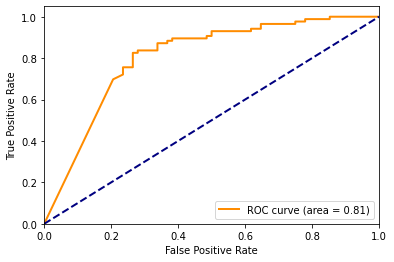

In [18]:
fpr = dict()
tpr = dict()
ro1 = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    
    ro1[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ro1[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig("data/roc.png",dpi=300)
plt.show()